
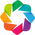

In [28]:
import holoviews as hv
import pandas as pd
import numpy as np
hv.notebook_extension('bokeh')

In [29]:
dr24 = pd.read_csv('nexsci_dr24.csv')
dr24.index = dr24.kepoi_name

In [30]:
dr25 = pd.read_csv('nexsci_fpp.csv')
dr25.index = dr25.kepoi_name

In [31]:
joined = dr24.join(dr25, lsuffix='_dr24', rsuffix='_dr25')

In [32]:
dr25_kois = pd.read_hdf('/Users/tdm/.keputils/q1_q17_dr25_koi.h5')

In [33]:
dr25_kois.index = dr25_kois.kepoi_name

In [34]:
joined['disposition'] = dr25_kois.loc[joined.index, 'koi_disposition']
joined['lnp'] = np.log10(joined.fpp_koi_period_dr25)

In [36]:
joined.columns

Index(['kepoi_name_dr24', 'kepid_dr24', 'fpp_koi_period_dr24', 'fpp_ror_dr24',
       'fpp_prad_dr24', 'fpp_secthresh_dr24', 'fpp_maxrad_dr24',
       'fpp_prob_heb_dr24', 'fpp_prob_ueb_dr24', 'fpp_prob_beb_dr24',
       'fpp_prob_heb_dbl_dr24', 'fpp_prob_ueb_dbl_dr24',
       'fpp_prob_beb_dbl_dr24', 'fpp_spec_occrate_dr24', 'fpp_prob_dr24',
       'fpp_score_dr24', 'fpp_fail_reason_dr24', 'fpp_steff_dr24',
       'fpp_steff_err1_dr24', 'fpp_steff_err2_dr24', 'fpp_slogg_dr24',
       'fpp_slogg_err1_dr24', 'fpp_slogg_err2_dr24', 'fpp_smet_dr24',
       'fpp_smet_err1_dr24', 'fpp_smet_err2_dr24', 'fpp_srad_dr24',
       'fpp_srad_err1_dr24', 'fpp_srad_err2_dr24', 'fpp_smass_dr24',
       'fpp_smass_err1_dr24', 'fpp_smass_err2_dr24', 'fpp_sage_dr24',
       'fpp_sage_err1_dr24', 'fpp_sage_err2_dr24', 'fpp_dist_dr24',
       'fpp_dist_err1_dr24', 'fpp_dist_err2_dr24', 'fpp_av_dr24',
       'fpp_av_err1_dr24', 'fpp_av_err2_dr24', 'fpp_max_av_dr24',
       'fpp_pr_steff_mu_dr24', 'fpp_pr_s

In [37]:
ds = hv.Dataset(joined)

In [38]:
fpp_dr24 = hv.Dimension('fpp_prob_dr24', label='FPP (DR24)', range=(1e-6, 1))
fpp_dr25 = hv.Dimension('fpp_prob_dr25', label='FPP (DR25)', range=(1e-6, 1))
fpp_points = ds.to(hv.Points, kdims=[fpp_dr24, fpp_dr25], 
               vdims=['kepoi_name_dr25', 'disposition', 'lnp'], 
               groupby=['disposition'])

In [39]:
%%opts Points [tools=['hover'] width=700, height=400, logy=True, logx=True, color_index='lnp'] (size=4)
fpp_points

:HoloMap   [disposition]
   :Points   [fpp_prob_dr24,fpp_prob_dr25]   (kepoi_name_dr25,disposition,lnp)

In [40]:
%%opts Points [tools=['hover'] width=700, height=400] (size=6, alpha=0.5)

rstar_points = ds.to(hv.Points, kdims=['fpp_srad_dr24', 'fpp_srad_dr25'], vdims=['kepoi_name_dr25'], 
                     groupby=['disposition'])
rstar_points

:HoloMap   [disposition]
   :Points   [fpp_srad_dr24,fpp_srad_dr25]   (kepoi_name_dr25)

In [41]:
dr25_stellar = pd.read_hdf('/Users/tdm/.keputils/q1_q17_dr25_stellar.h5')
dr25_stellar.index = dr25_stellar.kepid

In [42]:
dr25_stellar.columns

Index(['kepid', 'tm_designation', 'teff', 'teff_err1', 'teff_err2', 'logg',
       'logg_err1', 'logg_err2', 'feh', 'feh_err1', 'feh_err2', 'mass',
       'mass_err1', 'mass_err2', 'radius', 'radius_err1', 'radius_err2',
       'dens', 'dens_err1', 'dens_err2', 'prov_sec', 'kepmag',
       'limbdark_coeff1', 'limbdark_coeff2', 'limbdark_coeff3',
       'limbdark_coeff4', 'dist', 'dist_err1', 'dist_err2', 'nconfp', 'nkoi',
       'ntce', 'datalink_dvr', 'st_delivname', 'st_vet_date_str', 'ra', 'dec',
       'st_quarters', 'teff_prov', 'logg_prov', 'feh_prov', 'jmag', 'jmag_err',
       'hmag', 'hmag_err', 'kmag', 'kmag_err', 'dutycycle', 'dataspan',
       'mesthres01p5', 'mesthres02p0', 'mesthres02p5', 'mesthres03p0',
       'mesthres03p5', 'mesthres04p5', 'mesthres05p0', 'mesthres06p0',
       'mesthres07p5', 'mesthres09p0', 'mesthres10p5', 'mesthres12p0',
       'mesthres12p5', 'mesthres15p0', 'rrmscdpp01p5', 'rrmscdpp02p0',
       'rrmscdpp02p5', 'rrmscdpp03p0', 'rrmscdpp03p5', 'rrm

In [59]:
stellar_joined = dr25.join(dr25_stellar, on='kepid', lsuffix='_fpp', rsuffix='_dr25')
stellar_joined['disposition'] = dr25_kois.loc[stellar_joined.kepoi_name, 'koi_disposition']
stellar_joined['lnp'] = np.log10(stellar_joined.fpp_koi_period)

In [60]:
ds2 = hv.Dataset(stellar_joined)

In [66]:
%%opts Points [tools=['hover'] width=700, height=400, color_index='lnp'] (size=4)

pts = ds2.select(fpp_prob=(-1,np.inf)).to(hv.Points, kdims=['fpp_srad', 'radius'], 
                                          vdims=['kepoi_name', 'fpp_prob', 'lnp', 'disposition', 
                                                 'logg_prov', 'teff_prov'], 
                                          groupby=['disposition'])
pts

/Users/tdm/repositories/holoviews/holoviews/core/data/interface.py:202: RuntimeWarning: invalid value encountered in greater_equal
  mask &= k.start <= arr
/Users/tdm/repositories/holoviews/holoviews/core/data/interface.py:204: RuntimeWarning: invalid value encountered in less
  mask &= arr < k.stop


:HoloMap   [disposition]
   :Points   [fpp_srad,radius]   (kepoi_name,fpp_prob,lnp,disposition,logg_prov,teff_prov)